### Score: `[52.5]`

Q1. `[16]` GOOD JOB

Q2. `[20]` lon WRONG

Q3. `[16.5]` GOOD JOB

In [1]:
q1_path = '..\\Assignment_rd_common_files\\200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc'
q2_path = '..\\Assignment_rd_common_files\\NOAA_NCDC_ERSST_v3b_SST.nc'

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt

#1
ds = xr.open_dataset(q1_path, engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:                  (time: 210, bnds: 2, lat: 36, lon: 72, pressure: 10)
Coordinates:
  * time                     (time) datetime64[ns] 2003-01-16T12:00:00 ... 20...
  * lat                      (lat) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * lon                      (lon) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds, pressure
Data variables:
    time_bnds                (time, bnds) datetime64[ns] ...
    lat_bnds                 (lat, bnds) float64 ...
    lon_bnds                 (lon, bnds) float64 ...
    pre                      (pressure) float64 ...
    pre_bnds                 (pressure, bnds) float64 ...
    land_fraction            (lat, lon) float64 ...
    xch4                     (time, lat, lon) float32 ...
    xch4_nobs                (time, lat, lon) float64 ...
    xch4_stderr              (time, lat, lon) float32 ...
    xch4_stddev              (time, lat, lon) float32 ...
    column_averaging_kernel  (time, pressure, lat, lon) float32 ...
    vmr_profile_ch4_apriori  (time, pressure, lat, lon) float32 ...
Attributes: (12/28)
    activity_id:            obs4MIPs
    comment:                Since long time, climate modellers use ensemble a...
    contact:                Maximilian Reuter (maximilian.reuter@iup.physik.u...
    Conventions:            CF-1.7 ODS-2.1
    creation_date:          2021-02-05T09:48:47Z
    data_specs_version:     2.1.0
    ...                     ...
    source_version_number:  v4.3
    title:                  C3S XCH4 v4.3
    tracking_id:            892d184a-7b35-4bba-836a-94b9cfeb360e
    variable_id:            xch4
    variant_info:           Best Estimate
    variant_label:          BE

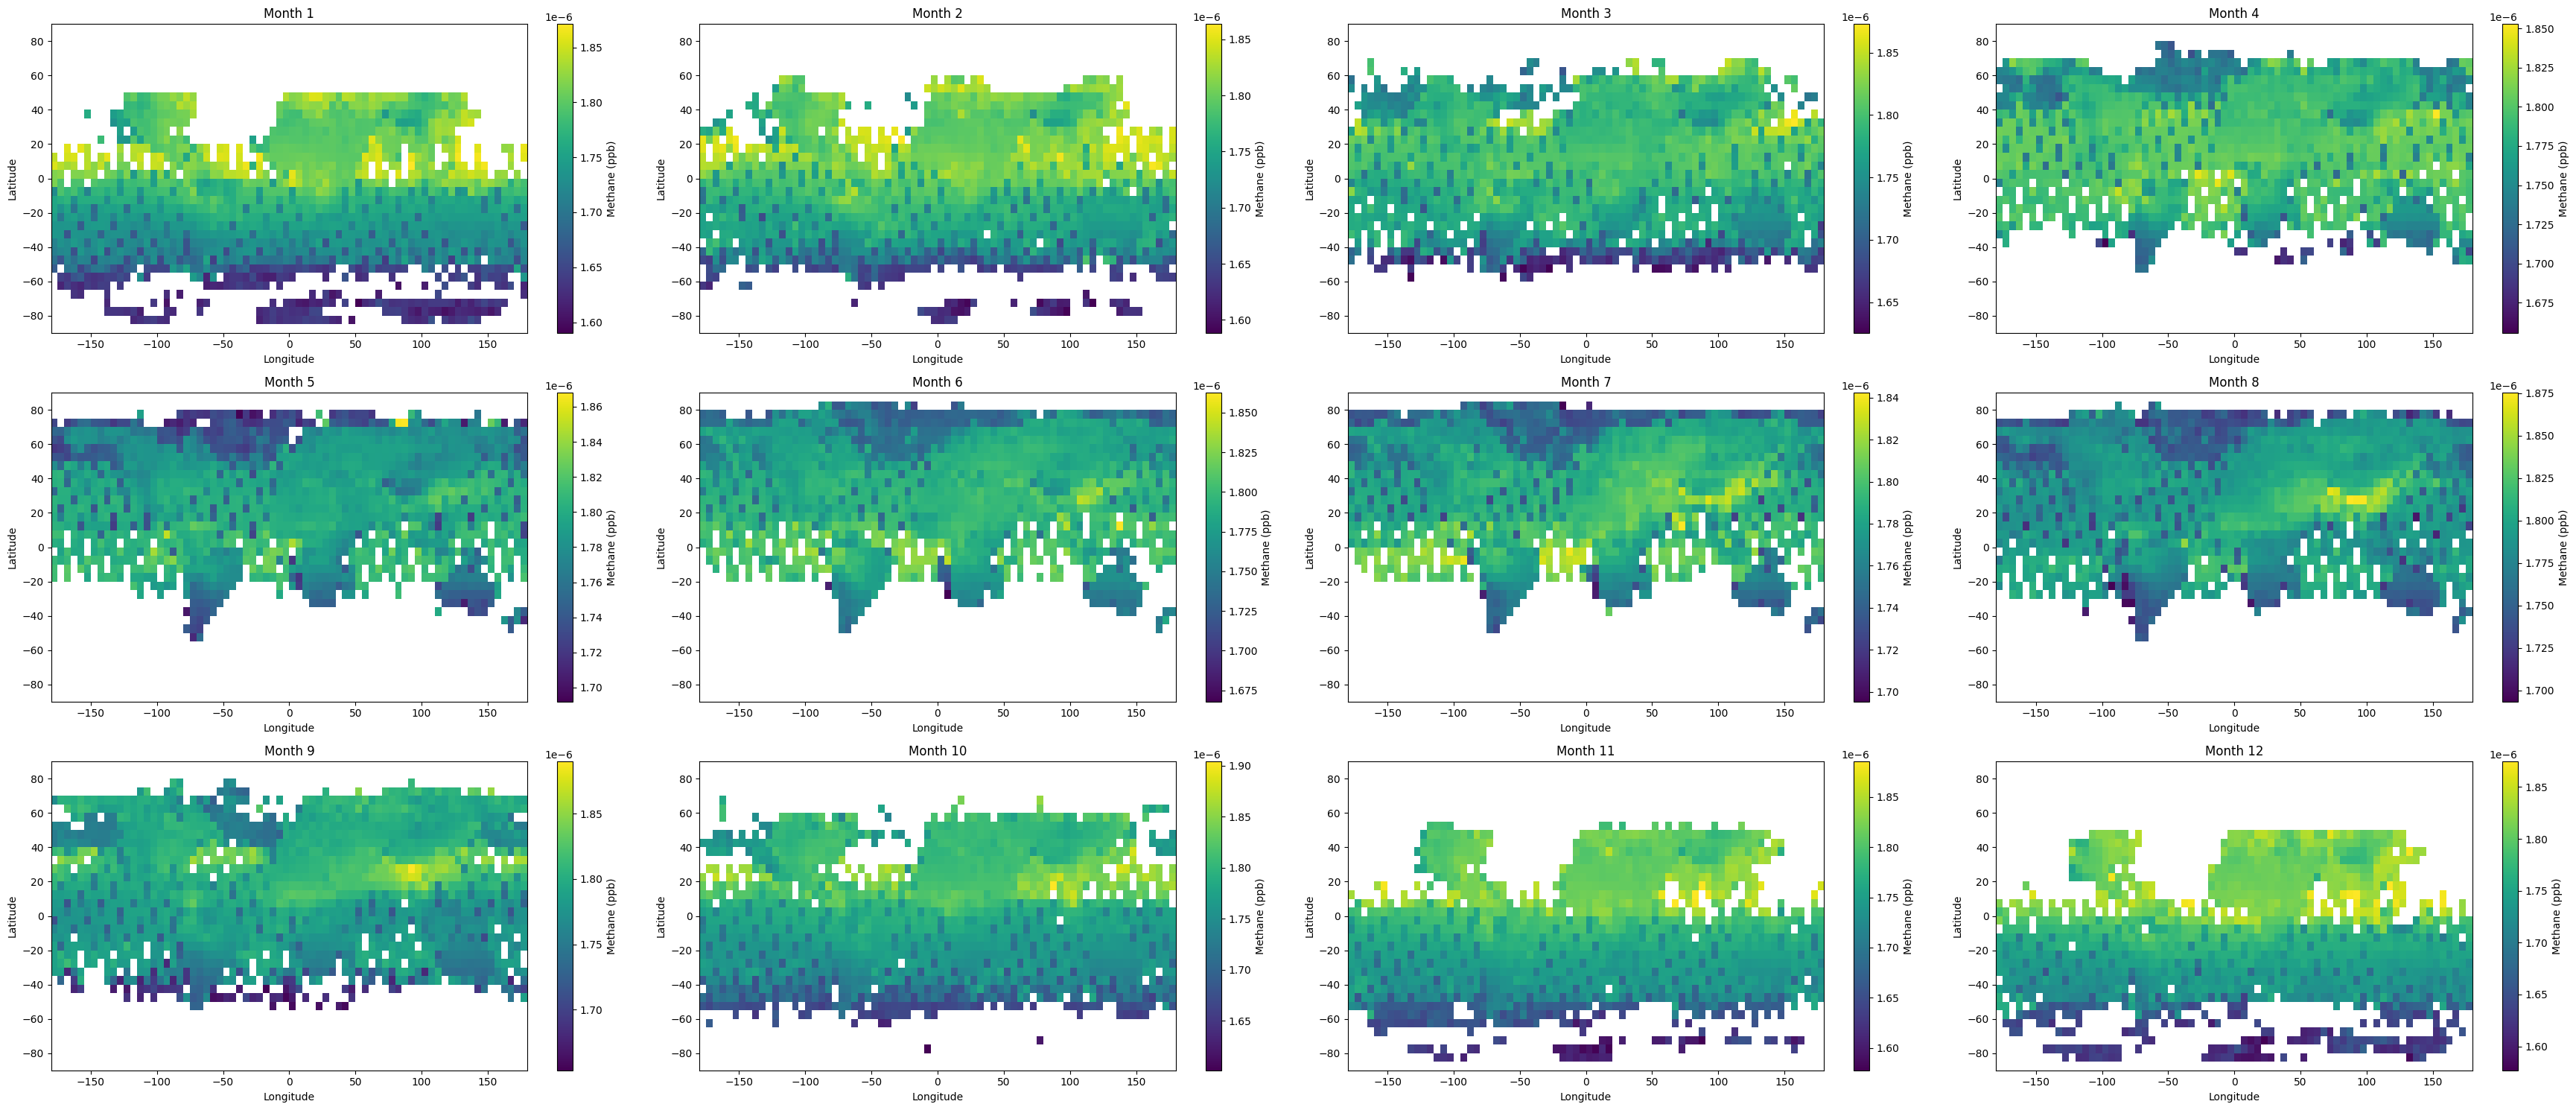

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
ds = xr.open_dataset(q1_path)

#1.1
#计算12个月月平均值
monthly_climatology = ds.xch4.groupby('time.month').mean('time')

#绘制图像，设定图像大小和排列
fig, axes = plt.subplots(3, 4, figsize=(35, 15))
for month in range(1, 13):
    ax = axes[(month-1) // 4, (month-1) % 4]
    c = ax.pcolormesh(ds.lon, ds.lat, monthly_climatology.sel(month=month), cmap='viridis')
    fig.colorbar(c, ax=ax, label='Methane (ppb)')
    ax.set_title(f'Month {month}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()

In [9]:
#1.2
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
ds = xr.open_dataset(q1_path, engine="netcdf4")

#为了计算全球平均甲烷浓度，需要对空间维度（纬度和经度）进行平均，以得到每个时间点的全球平均值。
da = xr.DataArray(methane, dims=['time', 'lat', 'lon']) # BUG: methane is not defined
global_avg_methane = da.mean(dim=['lat', 'lon']).values

#绘图
plt.figure(figsize=(10, 6))
plt.plot(time, global_avg_methane, label='Global Average Methane') # BUG: time is not defined
plt.xlabel('Time')
plt.ylabel('Methane (ppb)')
plt.title('Global Average Methane (2003-01 to 2020-06)')
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'methane' is not defined

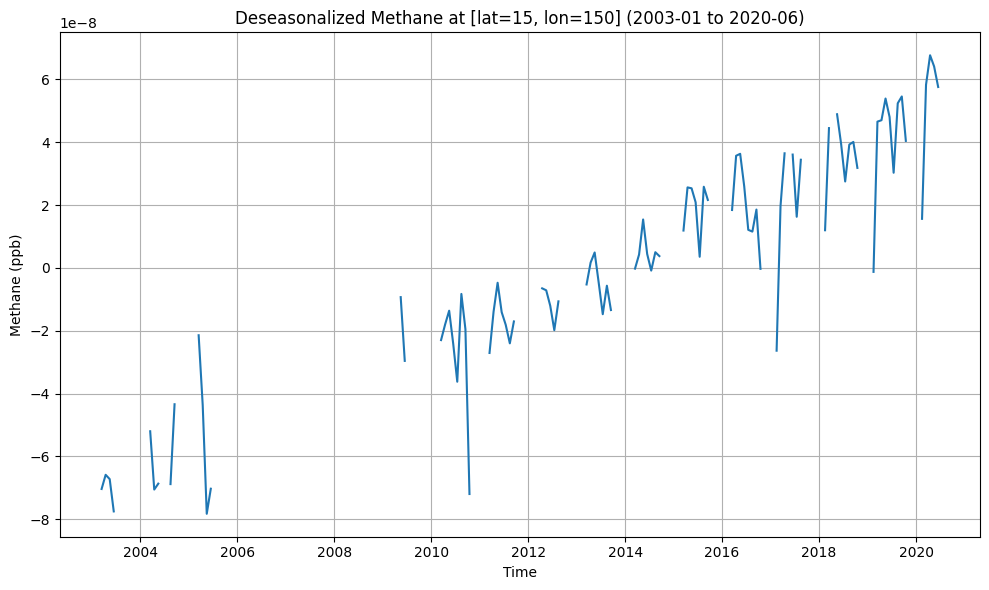

In [5]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
ds = xr.open_dataset(q1_path, engine="netcdf4")

#1.3（请教吴老师后修改）
#选定确定的经纬度
methane_point = ds.xch4.sel(lat=15, lon=150, method='nearest')

#确保时间维度是 pandas 的 DateTimeIndex
ds['time'] = pd.to_datetime(ds['time'])

#按月对数据分组再计算平均
monthly_avg = methane_point.groupby('time.month').mean()

#去季节化
difference = methane_point.groupby('time.month') - monthly_avg

#绘图
plt.figure(figsize=(10, 6))
plt.plot(difference.time, difference, label='Deseasonalized Methane')
plt.xlabel('Time')
plt.ylabel('Methane (ppb)')
plt.title('Deseasonalized Methane at [lat=15, lon=150] (2003-01 to 2020-06)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
#2
ds = xr.open_dataset(q2_path, engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

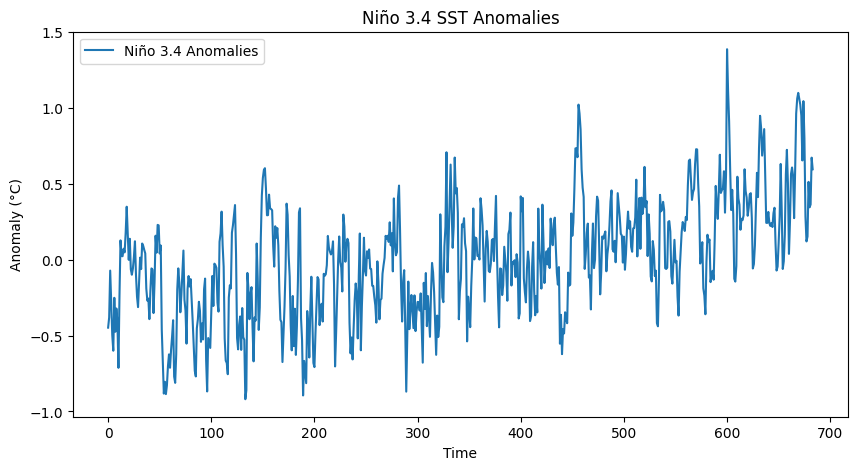

In [7]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
ds = xr.open_dataset(q2_path, engine="netcdf4")

#2.1
#选择Niño 3.4区域 
nino34 = ds.sst.sel(lat=slice(-5, 5), lon=slice(10, 60))

#计算月平均温度
monthly_climatology = nino34.groupby('time.month').mean('time').mean(dim=['lat', 'lon']).values

#将原始数据的空间进行平均
spatial_average = nino34.mean(dim=['lat', 'lon']).values

#将空间平均后的原始数据分为十二组
def group_array(spatial_average):#函数名称全改
    return [spatial_average[i:i+12] for i in range(0, len(spatial_average), 12)]
grouped_arr = group_array(spatial_average)
#print(grouped_arr)

#计算异常值
difference = grouped_arr - monthly_climatology
#difference

#将分组的数据取消分组
flattened_arr = [item for sublist in difference for item in sublist]
#print(flattened_arr)

#绘图
plt.figure(figsize=(10, 5))
plt.plot(flattened_arr, label='Niño 3.4 Anomalies')
plt.title('Niño 3.4 SST Anomalies')
plt.xlabel('Time')
plt.ylabel('Anomaly (°C)')
plt.legend()
plt.show()

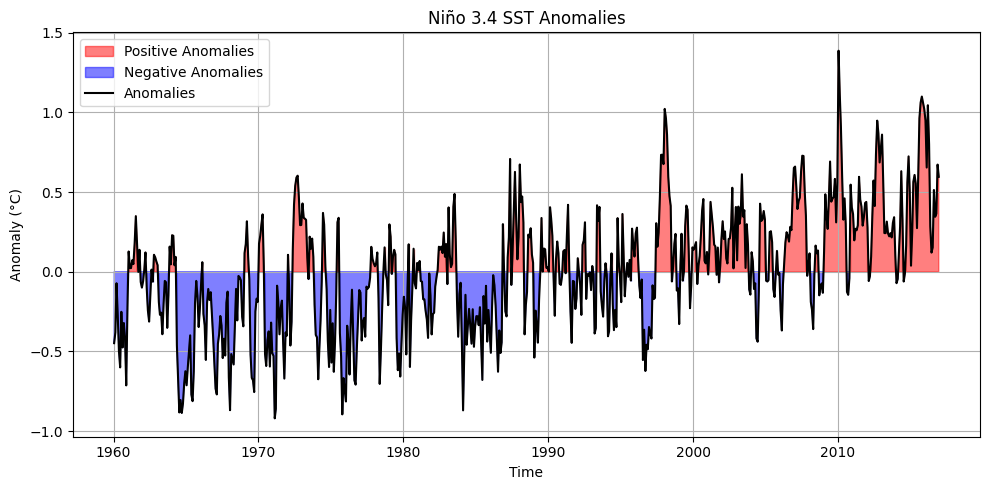

In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
ds = xr.open_dataset(q2_path, engine="netcdf4")

#2.2(将2.1的图像进行调整，和吴老师讨论后将计算过程调整)
# 选择Niño 3.4区域
nino34 = ds.sst.sel(lat=slice(-5, 5), lon=slice(10, 60)) # BUG: lon WRONG
#将原始数据的空间进行平均
spatial_average = nino34.mean(dim=['lat', 'lon'])
#算月平均温度
monthly_climatology = spatial_average.groupby('time.month').mean('time')
#计算异常值
anomalies = spatial_average.groupby('time.month') - monthly_climatology


#绘图
plt.figure(figsize=(10, 5))

#绘制正值和负值部分（来自ai）
plt.fill_between(anomalies.time, anomalies, where=anomalies > 0, color='red', alpha=0.5, label='Positive Anomalies')
plt.fill_between(anomalies.time, anomalies, where=anomalies < 0, color='blue', alpha=0.5, label='Negative Anomalies')

# 绘制异常值线
plt.plot(anomalies.time, anomalies, color='black', label='Anomalies')

#添加标题和标签
plt.title('Niño 3.4 SST Anomalies')
plt.xlabel('Time')
plt.ylabel('Anomaly (°C)')

#添加图例和网格
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#3
#将吴老师给出的文件整合成一个nc4文件，方法来自CSND
# import xarray as xr
# import glob

# path = 'D:/ESE5023 Assignments12432923/Homework/PS3/output_file/'
# all_files = glob.glob(path + '*.nc4')
# all_files.sort()
# #print(all_files[0])

# file_new = []
# for i in range(len(all_files)):
#     file = xr.open_dataset(all_files[i])['XCO2']
#     file_new.append(file)

# da = xr.concat(file_new, dim='time')
# da.to_netcdf('D:/ESE5023 Assignments12432923/Homework/PS3/output_file.nc4')

import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
ds = xr.open_dataset("output_file.nc4", engine="netcdf4") # WHERE output_file.nc4
ds 

<xarray.Dataset>
Dimensions:  (lat: 361, lon: 576, time: 86)
Coordinates:
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 2015-02-15 ... 2022-02-15
Data variables:
    XCO2     (time, lat, lon) float64 ...

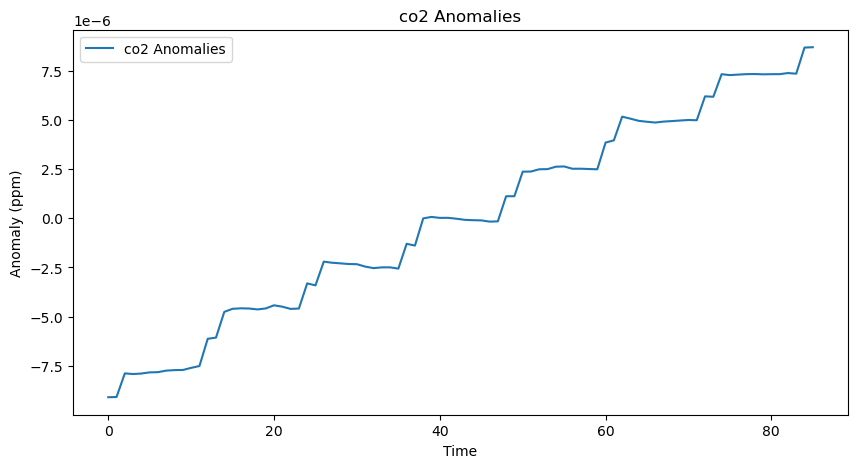

In [ ]:
#3.1
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
ds = xr.open_dataset("output_file.nc4", engine="netcdf4")

#选择XCO2区域
xco2 = ds.XCO2.sel(lat=slice(-90, 90), lon=slice(-180, 179.4))
#将原始数据的空间进行平均
spatial_average = xco2.mean(dim=['lat', 'lon'])
#算月平均温度
monthly_avg = spatial_average.groupby('time.month').mean('time')
#计算异常值
anomalies = spatial_average.groupby('time.month') - monthly_avg

#绘图
plt.figure(figsize=(10, 5))
plt.plot(anomalies, label='co2 Anomalies') # NOTE: 和下方图1似乎是同一张图，在指定 x = anomalies.time 后绘制效果将更好
plt.title('co2 Anomalies')
plt.xlabel('Time')
plt.ylabel('Anomaly (ppm)')
plt.legend()
plt.show()


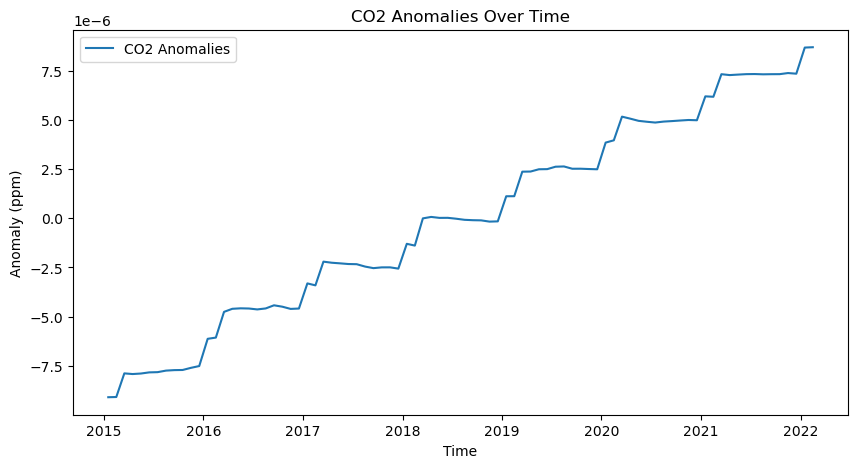

In [256]:
#3.2.1
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
ds = xr.open_dataset("output_file.nc4", engine="netcdf4")

xco2 = ds.XCO2.sel(lat=slice(-90, 90), lon=slice(-180, 179.4))
spatial_average = xco2.mean(dim=['lat', 'lon'])
monthly_avg = spatial_average.groupby('time.month').mean('time')
anomalies = spatial_average.groupby('time.month') - monthly_avg

# 绘制折线图
plt.figure(figsize=(10, 5))
plt.plot(anomalies.time,anomalies, label='CO2 Anomalies')
plt.title('CO2 Anomalies Over Time')
plt.xlabel('Time')
plt.ylabel('Anomaly (ppm)')
plt.legend()
plt.show()

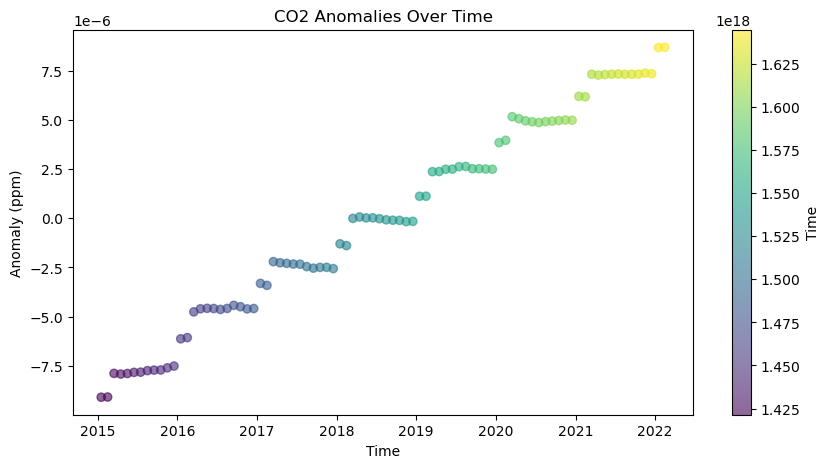

In [258]:
#3.2.2
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
ds = xr.open_dataset("output_file.nc4", engine="netcdf4")

xco2 = ds.XCO2.sel(lat=slice(-90, 90), lon=slice(-180, 179.4))
spatial_average = xco2.mean(dim=['lat', 'lon'])
monthly_avg = spatial_average.groupby('time.month').mean('time')
anomalies = spatial_average.groupby('time.month') - monthly_avg

# 绘制散点图
plt.figure(figsize=(10, 5))
plt.scatter(anomalies.time, anomalies, c=anomalies.time, cmap='viridis', alpha=0.6)
plt.colorbar(label='Time')
plt.title('CO2 Anomalies Over Time')
plt.xlabel('Time')
plt.ylabel('Anomaly (ppm)')
plt.show()

<Figure size 1000x500 with 0 Axes>

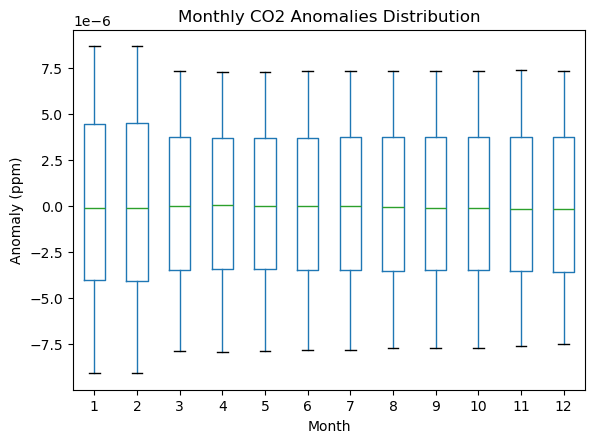

In [260]:
#3.2.3
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
ds = xr.open_dataset("output_file.nc4", engine="netcdf4")

xco2 = ds.XCO2.sel(lat=slice(-90, 90), lon=slice(-180, 179.4))
spatial_average = xco2.mean(dim=['lat', 'lon'])
monthly_avg = spatial_average.groupby('time.month').mean('time')
anomalies = spatial_average.groupby('time.month') - monthly_avg

#将异常值转换为pandas DataFrame
anomalies_df = anomalies.to_dataframe().reset_index()

#绘制箱线图
plt.figure(figsize=(10, 5))
anomalies_df.boxplot(by='month', column='XCO2', grid=False)
plt.title('Monthly CO2 Anomalies Distribution')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Month')
plt.ylabel('Anomaly (ppm)')
plt.show()

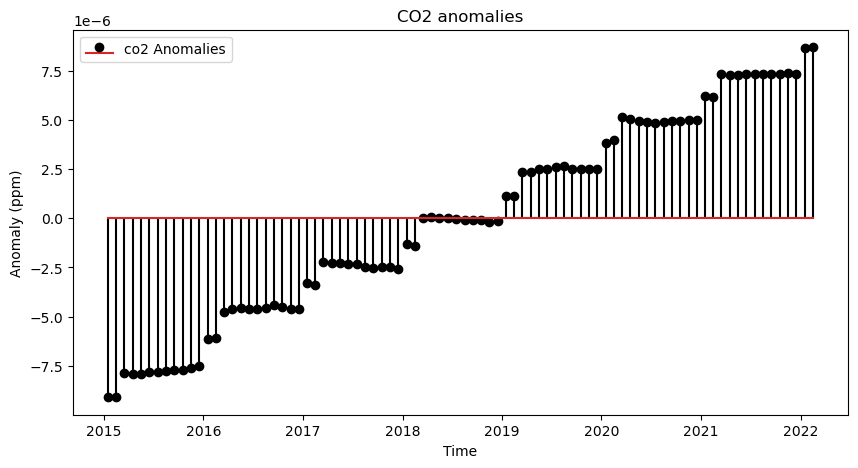

In [262]:
#3.2.4
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
ds = xr.open_dataset("output_file.nc4", engine="netcdf4")

xco2 = ds.XCO2.sel(lat=slice(-90, 90), lon=slice(-180, 179.4))
spatial_average = xco2.mean(dim=['lat', 'lon'])
monthly_avg = spatial_average.groupby('time.month').mean('time')
anomalies = spatial_average.groupby('time.month') - monthly_avg

#茎叶图
plt.figure(figsize=(10, 5))
plt.stem(anomalies.time, anomalies, 'ko', label='co2 Anomalies')
plt.title('CO2 anomalies')
plt.xlabel('Time')
plt.ylabel('Anomaly (ppm)')
plt.legend()
plt.show()

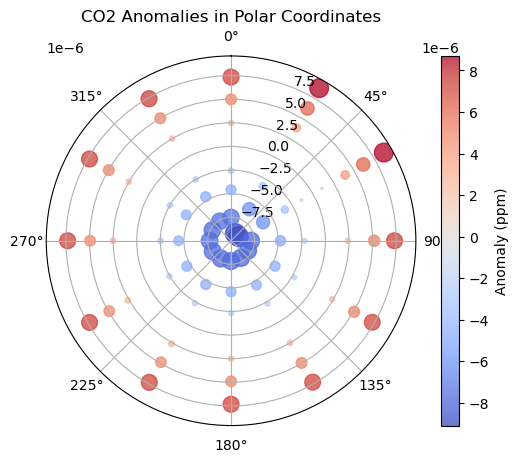

In [264]:
#3.2.5
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
ds = xr.open_dataset("output_file.nc4", engine="netcdf4")

xco2 = ds.XCO2.sel(lat=slice(-90, 90), lon=slice(-180, 179.4))
spatial_average = xco2.mean(dim=['lat', 'lon'])
monthly_avg = spatial_average.groupby('time.month').mean('time')
anomalies = spatial_average.groupby('time.month') - monthly_avg


#将时间转换为年和月
years = anomalies.time.dt.year
months = anomalies.time.dt.month

#将月份转换为角度（0-360度）
theta = months / 12.0 * 2 * np.pi

#使用异常值作为半径
r = anomalies.values

#使用异常值作为颜色
colors = anomalies.values

#计算面积
area = 200 * (np.abs(r) / np.max(np.abs(r)))**2

#创建极坐标图
ax = plt.subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='coolwarm', alpha=0.75)

#添加颜色条
plt.colorbar(c, ax=ax, label='Anomaly (ppm)')

#设置标题和标签
plt.title('CO2 Anomalies in Polar Coordinates')
ax.set_theta_direction(-1)  #逆时针方向
ax.set_theta_zero_location('N')  #北方向为0度

plt.show()

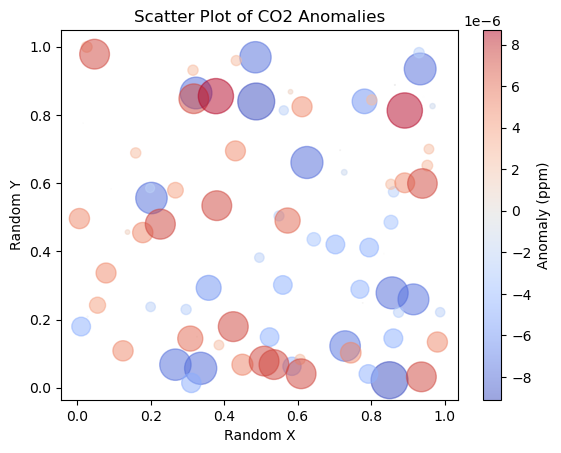

In [266]:
#3.2.6
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
ds = xr.open_dataset("output_file.nc4", engine="netcdf4")

xco2 = ds.XCO2.sel(lat=slice(-90, 90), lon=slice(-180, 179.4))
spatial_average = xco2.mean(dim=['lat', 'lon'])
monthly_avg = spatial_average.groupby('time.month').mean('time')
anomalies = spatial_average.groupby('time.month') - monthly_avg

#将时间转换为年和月
years = anomalies.time.dt.year
months = anomalies.time.dt.month

#生成随机的 x 和 y 坐标
x = np.random.rand(len(anomalies))
y = np.random.rand(len(anomalies))

#使用异常值作为颜色
colors = anomalies.values

#计算面积（可选，用于显示异常值的大小）
area = np.pi * (15 * np.abs(anomalies.values) / np.max(np.abs(anomalies.values)))**2

#创建散点图
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='coolwarm')
plt.colorbar(label='Anomaly (ppm)')
plt.xlabel('Random X')
plt.ylabel('Random Y')
plt.title('Scatter Plot of CO2 Anomalies')
plt.show()